<a href="https://colab.research.google.com/github/shreyansa98/calorie-estimation/blob/master/day_01-10epoch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

import tensorflow as tf
import matplotlib.image as img
%matplotlib inline
import numpy as np
from collections import defaultdict
import collections
from shutil import copy
from shutil import copytree, rmtree
import tensorflow.keras.backend as K
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
import os
import random
import tensorflow as tf
import tensorflow.keras.backend as K
from tensorflow.keras import regularizers
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Convolution2D, MaxPooling2D, ZeroPadding2D, GlobalAveragePooling2D, AveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, CSVLogger
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.regularizers import l2
from tensorflow import keras
from tensorflow.keras import models
import cv2

In [5]:
!wget http://data.vision.ee.ethz.ch/cvl/food-101.tar.gz

--2020-03-16 08:57:05--  http://data.vision.ee.ethz.ch/cvl/food-101.tar.gz
Resolving data.vision.ee.ethz.ch (data.vision.ee.ethz.ch)... 129.132.52.162
Connecting to data.vision.ee.ethz.ch (data.vision.ee.ethz.ch)|129.132.52.162|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://data.vision.ee.ethz.ch/cvl/food-101.tar.gz [following]
--2020-03-16 08:57:05--  https://data.vision.ee.ethz.ch/cvl/food-101.tar.gz
Connecting to data.vision.ee.ethz.ch (data.vision.ee.ethz.ch)|129.132.52.162|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4996278331 (4.7G) [application/x-gzip]
Saving to: ‘food-101.tar.gz’

food-101.tar.gz     100%[===================>]   4.65G  17.5MB/s    in 5m 52s  

2020-03-16 09:02:57 (13.5 MB/s) - ‘food-101.tar.gz’ saved [4996278331/4996278331]



In [6]:
!tar xzvf food-101.tar.gz

Streaming output truncated to the last 5000 lines.
food-101/images/cannoli/1767088.jpg
food-101/images/cannoli/3201965.jpg
food-101/images/cannoli/3778102.jpg
food-101/images/cannoli/2674065.jpg
food-101/images/cannoli/1169899.jpg
food-101/images/cannoli/1378086.jpg
food-101/images/cannoli/803909.jpg
food-101/images/cannoli/1067240.jpg
food-101/images/cannoli/3002709.jpg
food-101/images/cannoli/2612632.jpg
food-101/images/cannoli/3627612.jpg
food-101/images/cannoli/1798703.jpg
food-101/images/cannoli/560632.jpg
food-101/images/cannoli/512468.jpg
food-101/images/cannoli/2331523.jpg
food-101/images/cannoli/3118302.jpg
food-101/images/cannoli/1499412.jpg
food-101/images/cannoli/1557459.jpg
food-101/images/cannoli/146566.jpg
food-101/images/cannoli/96922.jpg
food-101/images/cannoli/1699562.jpg
food-101/images/cannoli/730051.jpg
food-101/images/cannoli/2177977.jpg
food-101/images/cannoli/2767028.jpg
food-101/images/cannoli/6564.jpg
food-101/images/cannoli/553447.jpg
food-101/images/cannoli/

In [7]:
!ls food-101/

images	license_agreement.txt  meta  README.txt


In [8]:
os.listdir('food-101/images')

['ramen',
 'eggs_benedict',
 'spring_rolls',
 'red_velvet_cake',
 'croque_madame',
 'gyoza',
 'falafel',
 'pho',
 'pad_thai',
 'frozen_yogurt',
 'mussels',
 'ice_cream',
 'breakfast_burrito',
 'pulled_pork_sandwich',
 'huevos_rancheros',
 'hot_and_sour_soup',
 'lobster_roll_sandwich',
 'chocolate_mousse',
 'onion_rings',
 'miso_soup',
 'waffles',
 'tuna_tartare',
 'french_onion_soup',
 'fried_rice',
 'escargots',
 'cheesecake',
 'cup_cakes',
 'poutine',
 'pork_chop',
 'edamame',
 'chicken_wings',
 'beef_tartare',
 'caprese_salad',
 'deviled_eggs',
 'clam_chowder',
 'apple_pie',
 'nachos',
 'peking_duck',
 'fish_and_chips',
 'baklava',
 'club_sandwich',
 'pancakes',
 'strawberry_shortcake',
 'beet_salad',
 'cannoli',
 'lobster_bisque',
 'samosa',
 'macaroni_and_cheese',
 'ravioli',
 'fried_calamari',
 'churros',
 'greek_salad',
 'bibimbap',
 'macarons',
 'scallops',
 'ceviche',
 'sashimi',
 'cheese_plate',
 'hummus',
 'filet_mignon',
 'hamburger',
 'seaweed_salad',
 'paella',
 'oysters'

In [9]:

os.listdir('food-101/meta')

['test.txt',
 'classes.txt',
 'train.txt',
 'labels.txt',
 'train.json',
 'test.json']

In [10]:
!head food-101/meta/train.txt


apple_pie/1005649
apple_pie/1014775
apple_pie/1026328
apple_pie/1028787
apple_pie/1043283
apple_pie/1050519
apple_pie/1057749
apple_pie/1057810
apple_pie/1072416
apple_pie/1074856


In [11]:
!head food-101/meta/classes.txt


apple_pie
baby_back_ribs
baklava
beef_carpaccio
beef_tartare
beet_salad
beignets
bibimbap
bread_pudding
breakfast_burrito


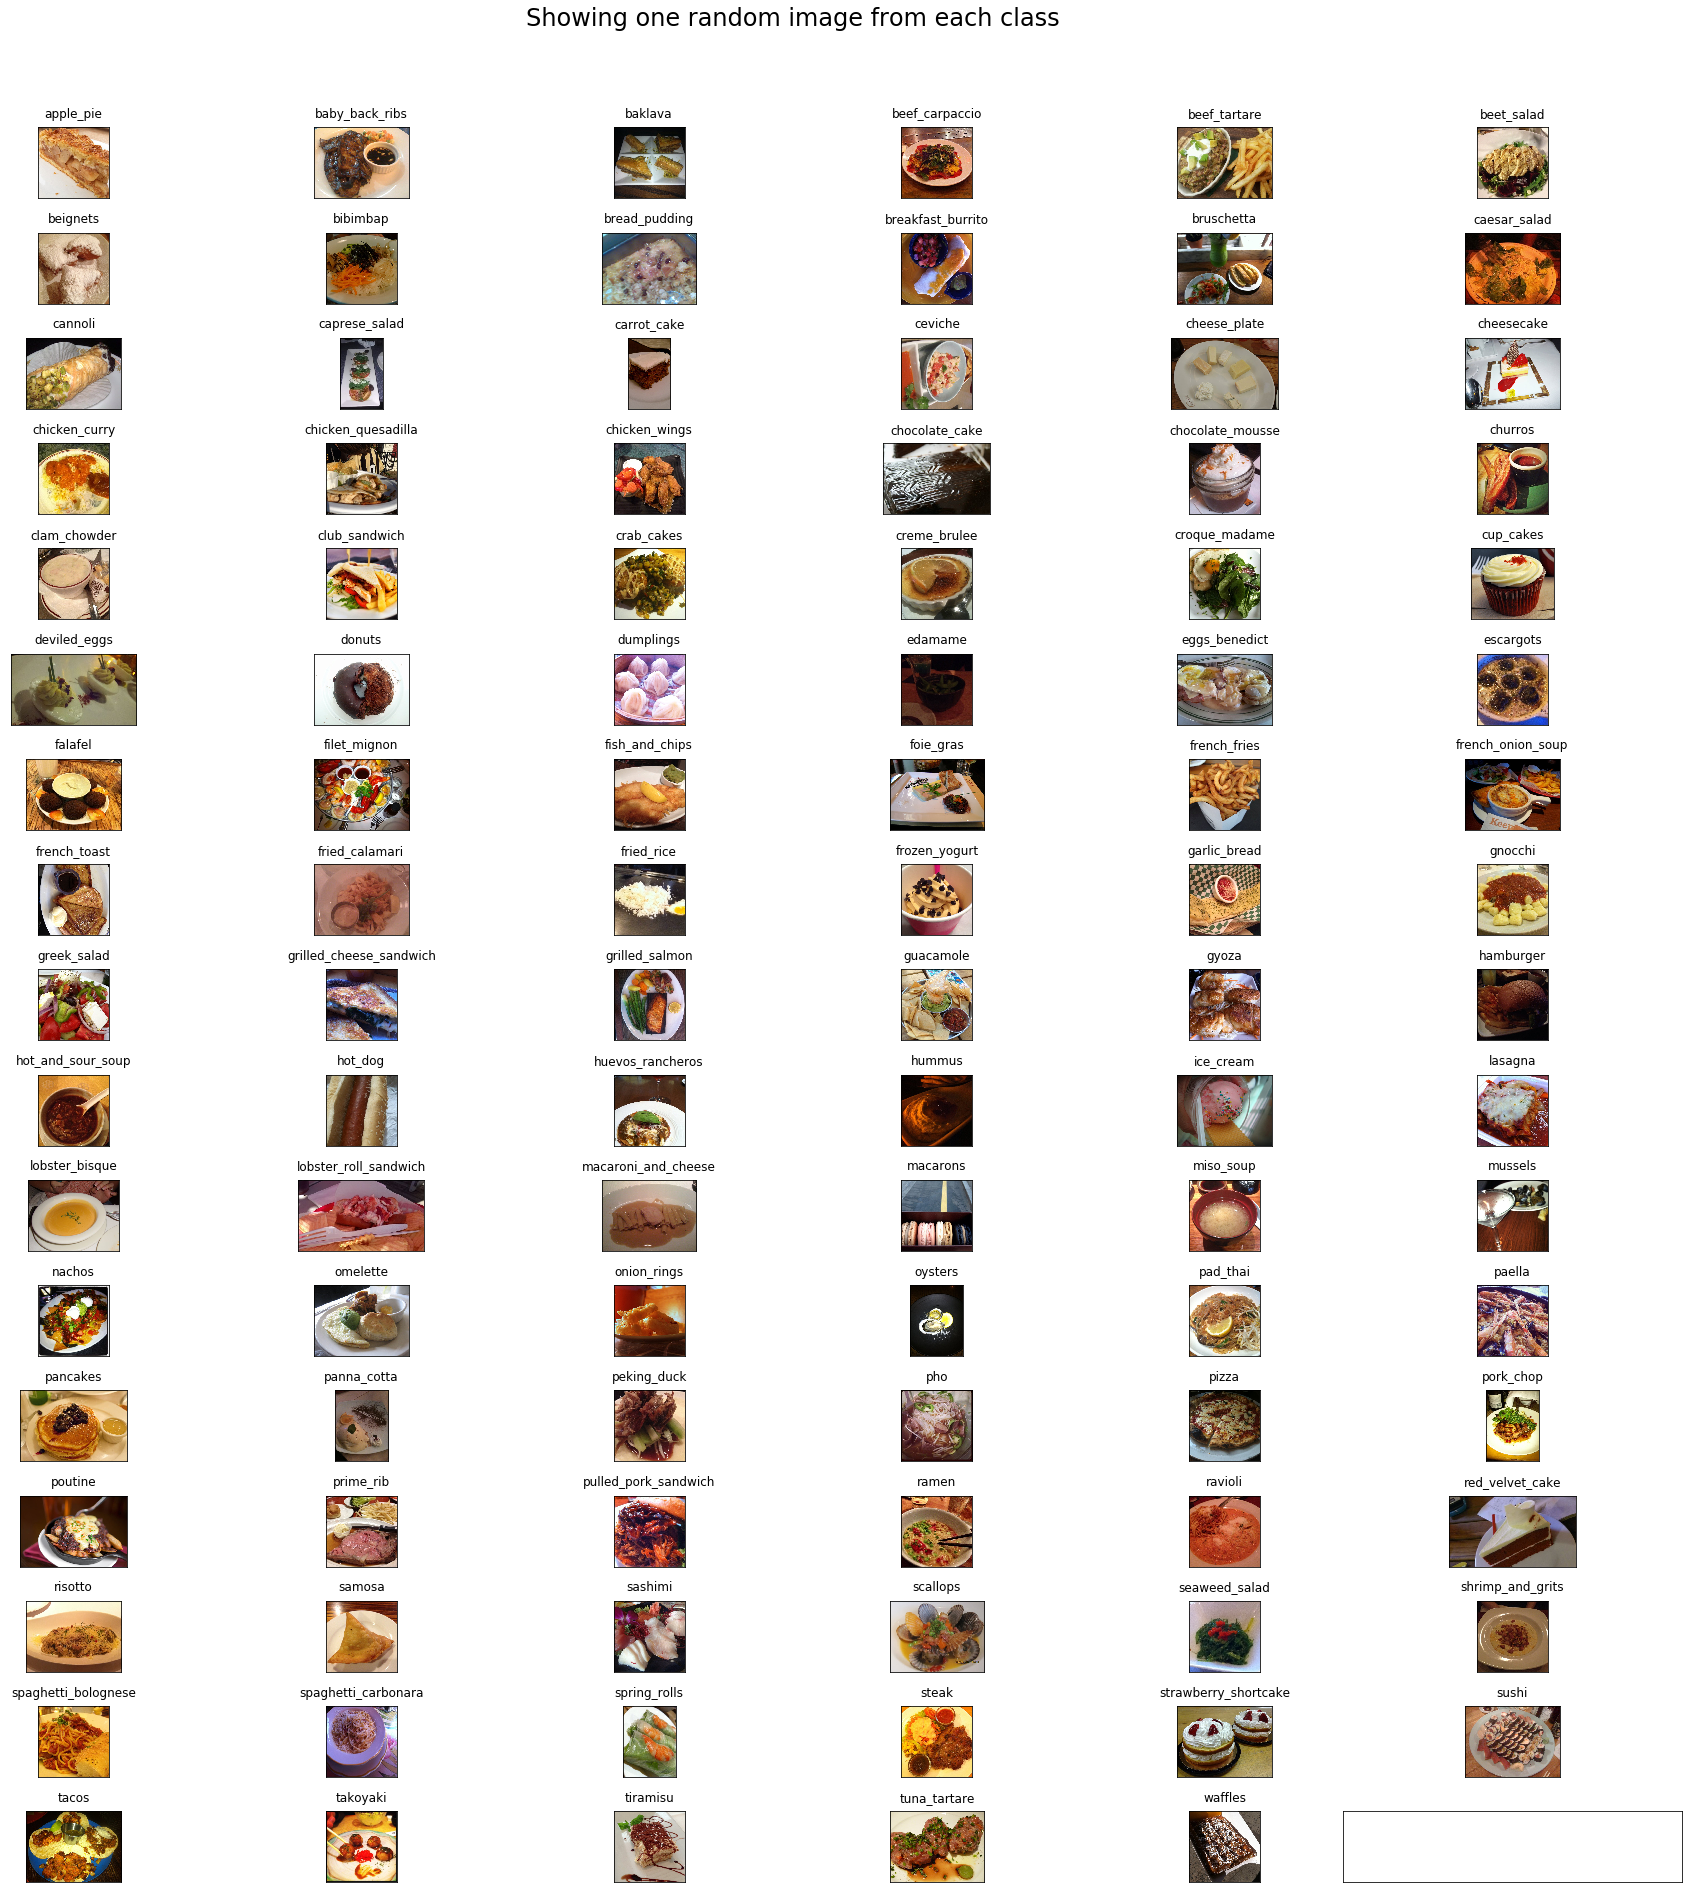

In [12]:
# Visualize the data, showing one image per class from 101 classes
rows = 17
cols = 6
fig, ax = plt.subplots(rows, cols, figsize=(25,25))
fig.suptitle("Showing one random image from each class", y=1.05, fontsize=24) # Adding  y=1.05, fontsize=24 helped me fix the suptitle overlapping with axes issue
data_dir = "food-101/images/"
foods_sorted = sorted(os.listdir(data_dir))
food_id = 0
for i in range(rows):
  for j in range(cols):
    try:
      food_selected = foods_sorted[food_id] 
      food_id += 1
    except:
      break
    if food_selected == '.DS_Store':
        continue
    food_selected_images = os.listdir(os.path.join(data_dir,food_selected)) # returns the list of all files present in each food category
    food_selected_random = np.random.choice(food_selected_images) # picks one food item from the list as choice, takes a list and returns one random item
    img = plt.imread(os.path.join(data_dir,food_selected, food_selected_random))
    ax[i][j].imshow(img)
    ax[i][j].set_title(food_selected, pad = 10)
    
plt.setp(ax, xticks=[],yticks=[])
plt.tight_layout()
# https://matplotlib.org/users/tight_layout_guide.html

In [0]:

# Helper method to split dataset into train and test folders
def prepare_data(filepath, src,dest):
  classes_images = defaultdict(list)
  with open(filepath, 'r') as txt:
      paths = [read.strip() for read in txt.readlines()]
      for p in paths:
        food = p.split('/')
        classes_images[food[0]].append(food[1] + '.jpg')

  for food in classes_images.keys():
    print("\nCopying images into ",food)
    if not os.path.exists(os.path.join(dest,food)):
      os.makedirs(os.path.join(dest,food))
    for i in classes_images[food]:
      copy(os.path.join(src,food,i), os.path.join(dest,food,i))
  print("Copying Done!")

In [14]:
# Prepare train dataset by copying images from food-101/images to food-101/train using the file train.txt
#%cd /
print("Creating train data...")
prepare_data('food-101/meta/train.txt', 'food-101/images', 'train')

Creating train data...

Copying images into  apple_pie

Copying images into  baby_back_ribs

Copying images into  baklava

Copying images into  beef_carpaccio

Copying images into  beef_tartare

Copying images into  beet_salad

Copying images into  beignets

Copying images into  bibimbap

Copying images into  bread_pudding

Copying images into  breakfast_burrito

Copying images into  bruschetta

Copying images into  caesar_salad

Copying images into  cannoli

Copying images into  caprese_salad

Copying images into  carrot_cake

Copying images into  ceviche

Copying images into  cheesecake

Copying images into  cheese_plate

Copying images into  chicken_curry

Copying images into  chicken_quesadilla

Copying images into  chicken_wings

Copying images into  chocolate_cake

Copying images into  chocolate_mousse

Copying images into  churros

Copying images into  clam_chowder

Copying images into  club_sandwich

Copying images into  crab_cakes

Copying images into  creme_brulee

Copying im

In [15]:
# Prepare test data by copying images from food-101/images to food-101/test using the file test.txt
print("Creating test data...")
prepare_data('food-101/meta/test.txt', 'food-101/images', 'test')

Creating test data...

Copying images into  apple_pie

Copying images into  baby_back_ribs

Copying images into  baklava

Copying images into  beef_carpaccio

Copying images into  beef_tartare

Copying images into  beet_salad

Copying images into  beignets

Copying images into  bibimbap

Copying images into  bread_pudding

Copying images into  breakfast_burrito

Copying images into  bruschetta

Copying images into  caesar_salad

Copying images into  cannoli

Copying images into  caprese_salad

Copying images into  carrot_cake

Copying images into  ceviche

Copying images into  cheesecake

Copying images into  cheese_plate

Copying images into  chicken_curry

Copying images into  chicken_quesadilla

Copying images into  chicken_wings

Copying images into  chocolate_cake

Copying images into  chocolate_mousse

Copying images into  churros

Copying images into  clam_chowder

Copying images into  club_sandwich

Copying images into  crab_cakes

Copying images into  creme_brulee

Copying ima

In [16]:
# Check how many files are in the train folder
print("Total number of samples in train folder")
!find train -type d -or -type f -printf '.' | wc -c

Total number of samples in train folder
75750


In [17]:
# Check how many files are in the test folder
print("Total number of samples in test folder")
!find test -type d -or -type f -printf '.' | wc -c

Total number of samples in test folder
25250


In [0]:
# List of all 101 types of foods(sorted alphabetically)
del foods_sorted[0] # remove .DS_Store from the list

In [19]:
foods_sorted

['baby_back_ribs',
 'baklava',
 'beef_carpaccio',
 'beef_tartare',
 'beet_salad',
 'beignets',
 'bibimbap',
 'bread_pudding',
 'breakfast_burrito',
 'bruschetta',
 'caesar_salad',
 'cannoli',
 'caprese_salad',
 'carrot_cake',
 'ceviche',
 'cheese_plate',
 'cheesecake',
 'chicken_curry',
 'chicken_quesadilla',
 'chicken_wings',
 'chocolate_cake',
 'chocolate_mousse',
 'churros',
 'clam_chowder',
 'club_sandwich',
 'crab_cakes',
 'creme_brulee',
 'croque_madame',
 'cup_cakes',
 'deviled_eggs',
 'donuts',
 'dumplings',
 'edamame',
 'eggs_benedict',
 'escargots',
 'falafel',
 'filet_mignon',
 'fish_and_chips',
 'foie_gras',
 'french_fries',
 'french_onion_soup',
 'french_toast',
 'fried_calamari',
 'fried_rice',
 'frozen_yogurt',
 'garlic_bread',
 'gnocchi',
 'greek_salad',
 'grilled_cheese_sandwich',
 'grilled_salmon',
 'guacamole',
 'gyoza',
 'hamburger',
 'hot_and_sour_soup',
 'hot_dog',
 'huevos_rancheros',
 'hummus',
 'ice_cream',
 'lasagna',
 'lobster_bisque',
 'lobster_roll_sandwich

In [0]:

# Helper method to create train_mini and test_mini data samples
def dataset_mini(food_list, src, dest):
  if os.path.exists(dest):
    rmtree(dest) # removing dataset_mini(if it already exists) folders so that we will have only the classes that we want
  os.makedirs(dest)
  for food_item in food_list :
    print("Copying images into",food_item)
    copytree(os.path.join(src,food_item), os.path.join(dest,food_item))

In [0]:
# picking 3 food items and generating separate data folders for the same
food_list = ['apple_pie','pizza','omelette']
src_train = 'train'
dest_train = 'train_mini'
src_test = 'test'
dest_test = 'test_mini'

In [22]:
print("Creating train data folder with new classes")
dataset_mini(food_list, src_train, dest_train)

Creating train data folder with new classes
Copying images into apple_pie
Copying images into pizza
Copying images into omelette


In [23]:
print("Total number of samples in train folder")

!find train_mini -type d -or -type f -printf '.' | wc -c

Total number of samples in train folder
2250


In [24]:

print("Creating test data folder with new classes")
dataset_mini(food_list, src_test, dest_test)

Creating test data folder with new classes
Copying images into apple_pie
Copying images into pizza
Copying images into omelette


In [25]:
print("Total number of samples in test folder")
!find test_mini -type d -or -type f -printf '.' | wc -c

Total number of samples in test folder
750


In [26]:
K.clear_session()
n_classes = 3
img_width, img_height = 299, 299
train_data_dir = 'train_mini'
validation_data_dir = 'test_mini'
nb_train_samples = 2250 #75750
nb_validation_samples = 750 #25250
batch_size = 16

train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical')


inception = InceptionV3(weights='imagenet', include_top=False)
x = inception.output
x = GlobalAveragePooling2D()(x)
x = Dense(128,activation='relu')(x)
x = Dropout(0.2)(x)

predictions = Dense(3,kernel_regularizer=regularizers.l2(0.005), activation='softmax')(x)

model = Model(inputs=inception.input, outputs=predictions)
model.compile(optimizer=SGD(lr=0.01, momentum=0.9), loss='categorical_crossentropy', metrics=['accuracy'])
checkpointer = ModelCheckpoint(filepath='best_model_3class.hdf5', verbose=1, save_best_only=True)
csv_logger = CSVLogger('history_3class.log')

history = model.fit_generator(train_generator,
                    steps_per_epoch = nb_train_samples // batch_size,
                    validation_data=validation_generator,
                    validation_steps=nb_validation_samples // batch_size,
                    epochs=10,
                    verbose=1,
                    callbacks=[csv_logger, checkpointer])

model.save('model_trained_3class.hdf5')

Found 2250 images belonging to 3 classes.
Found 750 images belonging to 3 classes.
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
87916544/87910968 [==============================] - 2s 0us/step
Epoch 1/10
 46/140 [========>.....................] - ETA: 6:10 - loss: 1.2527 - acc: 0.4470
Epoch 00001: val_loss improved from inf to 1.25266, saving model to best_model_3class.hdf5
140/140 [==============================] - 2425s 17s/step - loss: 0.7419 - acc: 0.7113 - val_loss: 1.2527 - val_acc: 0.4470
Epoch 2/10
 46/140 [========>.....................] - ETA: 6:06 - loss: 0.9918 - acc: 0.5530
Epoch 00002: val_loss improved from 1.25266 to 0.99182, saving model to best_model_3class.hdf5
140/140 [==============================] - 2367s 17s/step - loss: 0.4662 - acc: 0.8259 - val_loss: 0.9918 - val_acc: 0.5530
Epoch 3/10
 46/140 [========>.....................] - ETA: 6:06 - loss: 1.7766 - acc: 0.4321
Epoch 00003: val_loss did not improve from 0.99182
140/140

In [27]:
class_map_3 = train_generator.class_indices
class_map_3

{'apple_pie': 0, 'omelette': 1, 'pizza': 2}

In [0]:
def plot_accuracy(history,title):
    plt.title(title)
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train_accuracy', 'validation_accuracy'], loc='best')
    plt.show()
def plot_loss(history,title):
    plt.title(title)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train_loss', 'validation_loss'], loc='best')
    plt.show()

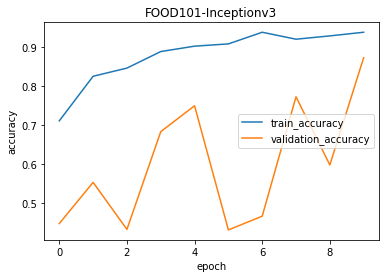

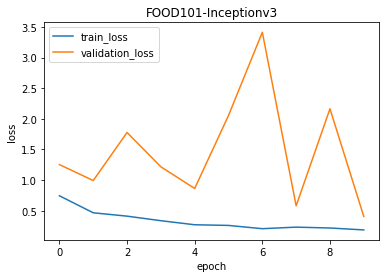

In [29]:
plot_accuracy(history,'FOOD101-Inceptionv3')
plot_loss(history,'FOOD101-Inceptionv3')

In [30]:
%%time
# Loading the best saved model to make predictions
K.clear_session()
model_best = load_model('best_model_3class.hdf5',compile = False)

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
CPU times: user 8.6 s, sys: 110 ms, total: 8.71 s
Wall time: 8.6 s


In [0]:
def predict_class(model, images, show = True):
  for img in images:
    img = image.load_img(img, target_size=(299, 299))
    img = image.img_to_array(img)                    
    img = np.expand_dims(img, axis=0)         
    img /= 255.                                      

    pred = model.predict(img)
    index = np.argmax(pred)
    food_list.sort()
    pred_value = food_list[index]
    if show:
        plt.imshow(img[0])                           
        plt.axis('off')
        plt.title(pred_value)
        plt.show()

In [32]:
!wget -O samosa.jpg http://veggiefoodrecipes.com/wp-content/uploads/2016/05/lentil-samosa-recipe-01.jpg
!wget -O applepie.jpg https://acleanbake.com/wp-content/uploads/2017/10/Paleo-Apple-Pie-with-Crumb-Topping-gluten-free-grain-free-dairy-free-15.jpg
!wget -O pizza.jpg http://104.130.3.186/assets/itemimages/400/400/3/default_9b4106b8f65359684b3836096b4524c8_pizza%20dreamstimesmall_94940296.jpg
!wget -O omelette.jpg https://www.incredibleegg.org/wp-content/uploads/basic-french-omelet-930x550.jpg

--2020-03-16 16:00:17--  http://veggiefoodrecipes.com/wp-content/uploads/2016/05/lentil-samosa-recipe-01.jpg
Resolving veggiefoodrecipes.com (veggiefoodrecipes.com)... 62.75.168.50
Connecting to veggiefoodrecipes.com (veggiefoodrecipes.com)|62.75.168.50|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 75560 (74K) [image/jpeg]
Saving to: ‘samosa.jpg’

samosa.jpg          100%[===================>]  73.79K   157KB/s    in 0.5s    

2020-03-16 16:00:19 (157 KB/s) - ‘samosa.jpg’ saved [75560/75560]

--2020-03-16 16:00:21--  https://acleanbake.com/wp-content/uploads/2017/10/Paleo-Apple-Pie-with-Crumb-Topping-gluten-free-grain-free-dairy-free-15.jpg
Resolving acleanbake.com (acleanbake.com)... 209.151.228.206
Connecting to acleanbake.com (acleanbake.com)|209.151.228.206|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 114276 (112K) [image/jpeg]
Saving to: ‘applepie.jpg’

applepie.jpg        100%[===================>] 111.60K  --.-KB/s    in 0.

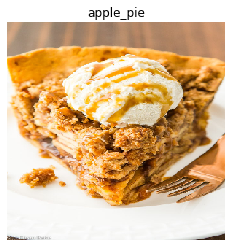

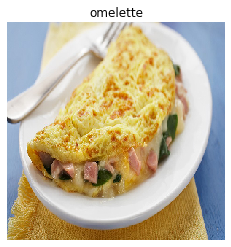

In [33]:
# Make a list of downloaded images and test the trained model
images = []
images.append('applepie.jpg')

images.append('omelette.jpg')
predict_class(model_best, images, True)

In [34]:
!wget -O pizza1.jpg https://www.washingtonpost.com/resizer/M-WnldvRmvg3qyWg0Om8ssM6E3M=/1484x0/arc-anglerfish-washpost-prod-washpost.s3.amazonaws.com/public/UM4VXMMJ5Y7T5MPQALWPL73RGM.jpg


--2020-03-16 16:03:04--  https://www.washingtonpost.com/resizer/M-WnldvRmvg3qyWg0Om8ssM6E3M=/1484x0/arc-anglerfish-washpost-prod-washpost.s3.amazonaws.com/public/UM4VXMMJ5Y7T5MPQALWPL73RGM.jpg
Resolving www.washingtonpost.com (www.washingtonpost.com)... 23.39.21.47
Connecting to www.washingtonpost.com (www.washingtonpost.com)|23.39.21.47|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://www.washingtonpost.com/ [following]
--2020-03-16 16:03:04--  https://www.washingtonpost.com/
Reusing existing connection to www.washingtonpost.com:443.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘pizza1.jpg’

pizza1.jpg              [ <=>                ] 391.09K  --.-KB/s    in 0.07s   

2020-03-16 16:03:15 (5.13 MB/s) - ‘pizza1.jpg’ saved [400477]



In [35]:
!wget -O omelette1.jpg https://msmarket.coop/wp-content/uploads/omlete.jpg


--2020-03-16 16:03:45--  https://msmarket.coop/wp-content/uploads/omlete.jpg
Resolving msmarket.coop (msmarket.coop)... 23.185.0.4, 2620:12a:8001::4, 2620:12a:8000::4
Connecting to msmarket.coop (msmarket.coop)|23.185.0.4|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 604131 (590K) [image/jpeg]
Saving to: ‘omelette1.jpg’

omelette1.jpg       100%[===================>] 589.97K  --.-KB/s    in 0.05s   

2020-03-16 16:03:46 (11.2 MB/s) - ‘omelette1.jpg’ saved [604131/604131]



In [36]:
!wget -O applepie1.jpg https://www.landolakes.com/RecipeManagementSystem/media/Recipe-Media-Files/Recipes/Retail/DesktopImages/2018_Maple-Glazed-Streusel-Apple-Pie_4917-600.jpg?ext=.jpg


--2020-03-16 16:03:51--  https://www.landolakes.com/RecipeManagementSystem/media/Recipe-Media-Files/Recipes/Retail/DesktopImages/2018_Maple-Glazed-Streusel-Apple-Pie_4917-600.jpg?ext=.jpg
Resolving www.landolakes.com (www.landolakes.com)... 45.60.62.207
Connecting to www.landolakes.com (www.landolakes.com)|45.60.62.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 210 [text/html]
Saving to: ‘applepie1.jpg’

applepie1.jpg       100%[===================>]     210  --.-KB/s    in 0s      

2020-03-16 16:03:51 (51.1 MB/s) - ‘applepie1.jpg’ saved [210/210]



In [37]:
!wget -O applepie2.jpg data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQABAAD/2wCEAAkGBxMSEhUSEhMWFRUXGRoaGRgYGRgfIBsdHR0YIB8fHh0aICgiHRolHhodITEhJSkrLi4uHSA1ODMtNygtLisBCgoKDg0OGhAQGzElICUtLS8tLjUvLS8tLS0wLS0vLzIvLy0vLS0yLS0tLS0tLS0vLS0tLS0tLS0tLS0tLS0tLf/AABEIAKcBLQMBIgACEQEDEQH/xAAcAAADAAMBAQEAAAAAAAAAAAAEBQYAAwcCAQj/xABAEAABAgQEBAQEBQMDAwMFAAABAhEAAyExBAUSQQYiUWETcYGRMqGx8CNCUsHRBxThM2LxQ3KCFTSSJGNzssL/xAAaAQADAQEBAQAAAAAAAAAAAAACAwQBAAUG/8QALxEAAgIBAwIEBAYDAQAAAAAAAQIAEQMSITEEQRMiUfCRocHhMmFxsdHxI0KBUv/aAAwDAQACEQMRAD8AJmKKQGVqezs/qQw9Y1Llk1Uq1R2v/MT2GxvhjUslqjzpt1rvt1gXMcVOMtUxC1aEhzpoRUXcOPMe8eQMJ7SrJgKd5VLWRUKFquWZuur62gdWZOOWoapqHfyaJbIMFMUVzZqlcyFoDkvzhiz7uxOzBu0MBJVKSebWgCzF+28GenobQsGgN5o3RKCpJTqCSlYI1BW7hnSDcq6C0A4nFKfQgkJRR91Hcn1FBsG9SctUVa0gEgp1eWgE7wMUIWos4Ki9VAivoGHvHdh6y/Gy6mvcD6wnLsWtyFLLaSxDhjs+lqOw9YZ5fjsQtSUIxEzmLOlcwNe+vyhVKwZKvCRVjajqLsDXvTt7mLDK8qUkhCVfCQpSgmuvSwSHuAFE2F09S2hiDuYjqGxAbAWYUjBYhv8A3uJ2HxJN/wDxj7KwM8qUDjcTpSwcFA5quLbBqjd+kEzVeENSSFrBCQCrdZADgUF31bB+4PzHZiiRLAK0OALOsqJc2AFVVLk794pU2J50leJsBPKvBTOnTVL06TMmcqQSQSp2QQGAqzkhnsVeS/0txEyZzzpQkhTFSdRUrrpBSB6v7w+xM6cv8WYlQTqA5RXlJ0pJtQkk9SfIAzA4+eSmWg1BbTqIfd/LzO4iV+qVTQ3ladO5W+IxxHG2EwpRhpSdelkXCUskEEgn4m01t6x7Xmn96hBSVyZTkskAiZVnL/lF2770jnvH2Cwsmbzp8GeBqGglKFHsmoI2JS28UHCWdlSUytaikFnSBTsHpR/aF5cpC2eO+3v949OnUC15jvPcSMKuXzMFlIl6QBq5g4Lh3Y/D7RL8bLCMbqDS9RAUqgdg3uyh5xW4vIFYjS60LTLWFpKkmigTYn8zQn494XxM5XiSkpNBUEAggC4OziAWjv2Pw7zUcKw33/qCyMqmB5kuaJqFByC6WsbgsCL1IhJjVqXiEYdUtRmPrSlQLBP6g/5XF9yIJyXNp2H5ZyNK90kg6i4aocUoYfSuI1FQStCCkUYgOB2N4UTpskfCVnX/AK7wrASUBGhaaA7dfqqAsdmWDlURIlF359CVHUPMGrwRxhilSpMuZKAmJWAWccpFam4SWUlxWN2KzDD4/CBKk/hkApAAZKhZm+FSVdO/RowXXmND33ku3NXJ1pmK0rky0q8PUSEpdbkgVSohxs1q2qXNmZhiEytM+TMShAYrEttLdQDQB6khmO0IcIpeCxSFIQUS1F5YcWtcE/hmz09I6CnMhiCkHQXvLN1BmI3BHZ2a9Ia4Ciief2hsxNECx+0n8wy7DS06wmUtCwD/ALq71oHINP4MTGDzeWcR4aUBSCG0OkhiC/M7igi1zjh1E2SJJCzLNBpVpXLqxKXBGn3iUyn+miJWISVT1FJPKlkpIBdgtTqBpQs0aDj31Gj2EFHgmaZccPMdKlBCi8tQBsdj0UPnDDLRPV+InDPMmAazN0y0rUAS4QtQGpvzC7Vs8O8fnEuWgolKDIIGsakhWxYEkjoCSX7WgKVnypRIQklQVQPMVRj8ISpxc1f0jg10DvGlSRcQ59PxSVJVPSPCunRpKQ1nKbAd6V9t05QV4K1SXLFiwJA1BiHsDykHsLUiqweJWQFqliYkizJdGmnMDZ3vekbp82SVJmEAnSQAWIL9RY02PU0eFvluiRBLVtI/E4+UmY3hKM0hlKls7CwYP9ekeZuJXNTTUoAqYkKdtwe1PrFPjc0A5EMlqsgAD2FImMzzGX4pBWxOz7teDxZD/qDBZQ3IgpQpnKS3VjHgGDU4CbMQlSZiyLlVAT5EwNMlTEr5mCSa6vkfO3vFK5wZMel9DMlmDJKoFXKZIUC4ND0fsdxSPUlcPVgwsSR1KmjHGHXDXDLhDJmQxw86GCBHksAhjUR7w+XykuyBXrX/APZ2gTDT4PlzY2gdyIM5UUiYsLBCnZwXHNZVDeooHfZoBkonTVhQ1p0khLOCVbnsOx2d4NXl8zSXSpKfiUlqlttSfy9RfetYNw08FJSZidTgpdYp5gkcv+37ACVMxMJn4ZRIUNwHAsCAXAoaPHmZgynTMchgX2YG5q1t321QVh8wSfhZvMN79I04jGSyDqWhIeoKgxG4tbe1Y0wAYXh5oTNSsVBISQAaagxFrOY2ZdlfiLKV0CWp170sAduvzExeYSxLUEqBWzpAqSbps9zvBGE4hSg6loXvdgOYId66mCkmwNDHAes4tUrZ+CSmUopSlwlRYpSQos9d/nG7CpAlgHSUn80xbA1d2uqZ1FHY+QhsfxXOmPLToCSzaAVFXZ1MCOxSH+Ub8FkmLxLGY6U/qmkkj/tSbexEHpU9oEZZjnaSwQ6kpU7kaEKUzUlgalDsdSnawFdWHxRVNUJr6ggM6Q4BAIIH5aEd/kIp8l4ckyTrLzJn611PoNh2hPxll6pk+WuWHVp5+gCS4foTq3/aEdUtYjvUf01HIBKDh7FeJL0yimigFFtLMbMBctSzOfKF+bYZcqaMRIlzJgJImaOa5qWTuCNm3pCvhbK1SZqyrGITrDlCQ4dq8xUxIPZ7Qyy3Ff2KlyNRmpcl6AAE0Ia5qRfbtHlHSBTGxLih1HT8PWec9yiXjpIRODT5dUuWLGrPsCP82ieyTDjCoJI5H5aAEp2etBua1MdB0pxEtQYlNwRcV2HTqOkc34vxcxEtRQklQ5SQHY0qQahn3DR1nIoQcH37M7CaJuOpnHf9qdC1DSQCEgOoDqSHCT2Y2tBWW8fomDUkhSbcwKS+/T6COVZLlPipUJj1YhWqoq5LEG+5esWmVZFKAYLC2uCm/qP4hmQJiXTqNiH4QbzFZS4yXJxz8q1FPQpDdCCbexiSMkyJ/hzArS7B2ue4/aGuLmf+mD8GTMMh3IRUoe5YsSh9w8MsRnuHxGFUuZpWnQ6FC7ty17lhWFjy7G6Pf3xFqxB8vHzm/J5oA0HnlqoRQ36O4bt5wJl3DsuXNUqSuYMOtQ/DUk0VVyCxoQLaS/WAcun+FJDOo6W1Ev09WY+cLsy4pMpYI5VEfAgOd2Je3RzWAxBySo3Ec+Pcm5XZ3w/hH8bE61bjSnSkAnfQ1bAkq6RHZlO/tpstUggS1KoDUJJqkgF2szOdrwGvjKahOqZKnGW4dSlakh6MQWoaVg04WZmMtK5GHKJaEnVMWVIQojcFQ5lbcriK6ct5ht8YpaQcyywuMmTUjQQ4LhbMWatC4VcsA3paPk3xBOSEpIQeZJLqLn/cenSIPIuJsRhCpEwgMQAASQU+ZFx3aOhYXNZSkomKWQVNRL77lvrQwjInZu/f37+E5lI3UbTfg8OZusrlJUhadKiQGUAaOd2MIs3y2ZgJeqQnXJLDVLdSkE3CmqoP+avfrFHhJZWkTErUZOl0/DyuauRtU1IoCXsILxvEqZSvDUEiluYm2zBiDsbQ9cKBKyE+/p79ZOGcP5Rf5TneH1KUC5JNQQoi3pX3htMw6VvQOWqi5NAOpUST3+Tx5ORSZy5s2SpUsrLiWVESwo1UwHMNR73LtcQBh8fMwytM1JU5HMp+UN1G27+VrCQi90NiXF9XPPpN6OEtKtU6aoruJYAFO51OT1DDeDx4A1ApQEseUgVomlRcEGxcsL2gnDYiXipaEFSUKAUASaEPQM16Pq2q9oUScqCkrkzXlqpoWBYhzUFnd3KSx77wzXvZ4ijx5oBj82Sn8OSGUVUUampUGDKIYNcAeQgSfwx46vxJoSSHIAWSp97gM/YiEub5LPwU2WZqkrcEpmICgl3PK53avWp6Q3yvNlqmJIskAN1qd/nD3RkFoZoYMNpox2QTcIpaNXioWhJQbMQocvQMmoa7mtHheJqk/EhQ/wDEn5hxFxjcedCULQiYBUEanDnZ6HytA8yUghJUgoKn501SCG+JP5aEWJ8obg6hDs3Mkz4cjHVJWXmSBdQHnT6wTLziWPzj3hyvCaSx0noQXBHUHcR6GGHQReFEgJgMnOT+RC1eSSPmphDDDYjFLDhCUjpUn1gzBYFyABFhluWpSmogtEG5ywgS+UqZg/p+8YrElIJBLC5hrMkpFyR6n+Y1jLtQoFEeQ/cQDsi8moVxDi8U4r130X/+H1gRM2b+UrT5FI+iBFMvIFn/AKfsGO/Q941zcAEABQKWsASD9IFWxv8AhYGbcncVImBC5hClMP1KqXarKFIYcM4CXOWUrGs6QoFLpA6guHO28FTUqWnQfhPe/nDjh3BDDpKZSS6rkufQPYQ0KLnXG+XZbLkklICTQPo/cXMFYrMBJlKmKU6UVJAvsEgP8RLAV3jXJwy1nnNOkA8fnw8EEgfFMQPJnV89LQbNSkwsa6nAM9YHOpk9QOrSg1CQH9yGf6R44qy9aEBQNC5LJOo9y1G7nfpEll2NJmiSpaEyynmVQqSxFn3f72jquR4VCJKjrUosxWtWo1sGAHnaPBbU2Tznc7/8/aeu5XEAUG05bkKVTJnhyyH+V2dR2gniTNZctYSp/FlkoWkEn4Xuz9XB6ekFcHcOYyXjMVq0JkJVqC2crcAp0gXSEly7VPV2YZ1kErG/jS1+BPYJUWGlYFtY/UP1D1ejEQniAtx2NzDnM05Bnakc6CSCLXBHlFbhsxRNSVpdJupNCCaOQDSwAbp5PHMsrRMwuIGGmhlKLoIsbME3Be8dGwOClagzooHBJFCCC7g+VCP2hTasT0vBhZtDjVW8UZvk+GUtRlEYeabpuhQ6hjyv2t0hFh2lTtBWyttJ3HQipHz7R0E8O4YpAOqZq3JL/wDAB+3iX4/4YSlCJuHCPwgHSOUqS4p3Vu9L3h3hsbLGKxZwDp3jlCEzkpL8y00UCCTpcGjcw3sOtIiMz4dmJUUgJ0LVr5FOlXcDz+bxR5JnjS0aqih8n+/lHziTFPh5qpKdSk8zCpcMC3R7RMMulgBsTGLaNdSOzXNTJQESk6l2SnZ/1FrAfe0eOFpssTicQl5hq5ANXDlmY9NmhvwRlCJ0k4qeXXMUTRuVIbSALs31MfM4y4BWpILg3ozUagH+KxUQqgp85niam3lbi5EmclJ0jSnSVIISQpB3P6mIHk0M8QvWllqLup9KSRc0HoI5rLxaiyFUIBF7j+YecM446Fypq9IU5ClE3Y0e7UHo/aJyCoNw3wWtg8RDxNh5CZiqqXsQUsFO9Hf5iAkZhMVuUh9uvp+0Nc+wZmCpBKaaUlx6HcQvw0rw0urezXdjbcX7Q9GUoL5jVIUR9geMJ6R4SuYaCLkXejWI7lvS8ZM4rUWnzQlKUJEsMFaWBLAmxPuzQPw5h5U4ErSVEPynr/uv86VjWrOpshfhqlBSHB0sGbYWaMZtZ0fWAFUkkCO8rzwqrKQF7OztZqkN2jTnfDmLxaXC6h/9Mhh2JdgezmD+HpWFMnVh5TE2Qo6tJcuNNzcDdqWhsMcoS2VhihnTykJDmzG6Rvs8Bj0YzUnctq8onO+GsBjpE0CdLPhgt4hPK1XsXc9hUxfSZgWJqVIU4SyUqA1GpZ9RAoBRWrpaJvibNClQl6piSG1JUdVCHDEl2IY7M+0JpOcqExKUzCfYqq7bOz94aQC2oi/lG6Sy7mpSzfFCFpxOHSqUaD8QAXrepFKm3nHvLlSRLMqUiXKCjdK5ZLtvzOaDz94WYfK8W6ZpSAUvWYtiQdm0q6neF+JRMSoyxIKlsLAFz1DO4Y9KQpgp8q/C4QCH3956zeetBKdQKblhQXPpZm7eUZhsIrGJB5pUoByEkJK2epJBYbdfIRqRwzjsQvUTJkoTRKVzA6gWqUywvez1gPCKxKipGhZUhRQqoGkgsdRNB5vBhKUEEXM1BuJdYHIguXpko8NSSSEaipKhT4V7eR3O0DysGdTEMRQg7QDk+KVhlpVNnyu6UqNQQ3xMAB3ityuejE/ioQUD4WLk0pcx6HS5LAU8/vPM6rCQdQ4mzKsCzOIeITSkeJMto3JEXSSc8kZddjVjzEOx8v2gXJ86/DKZoHiyzpW1ibgjsR7xR4PFykpIW7MzgPHO+IU6JqlhQLj5pqxF3Zw3cR88iDIPMbJhX2lths4SssKGGasOmalinUN3jl+RYhRUCHIeOq8PTXq0Y2CsoF8zAYmRk6ZZoHHeGCMO1hDfM9BCmIp/j79IDwkwER6/T5P9GNkfOcZ5kohbxqhH9jiFTSyUI1gt+ZJBS3cqZPrFAlokeIp8rMdWBH+klX4ixMCQpaX5PhUSkKYkgXSBa7s2REW2jMSOzeXtvOb4VHiEoTLQpZIBrYNVQPWgjpX9PJqpU+ZhwdUssRMUS6qEi7Fxa28B5ZhsFgfwQVSlgAKSQFh2pzXdmG9LNA82YiUqZ4c5KtQDaQolv+47X948V829genrfvtPZ0F10kc/CX09YQROQKGigO9BQUHRu8Tma5ZKC1TUzChB5igfE52ANn+2hrw/PKpCQSOd+oLhKWYhg7vU/wAwlzqYpRCdKipRYJCga2Ny/fyfaE5L5Uc/L3tE4lpyCZtwGPSUEaCoBVAlnSWLuVO4f942TmKTMUtSE0cUfZmZt+0IczRPwqQqXInEgGqa9AzIfv1JicnZpOmzgMQpUmWo/m1JNthsz2oYxenZt/T4xx03ayoxudJw6qzSouwKixKT0F7dI8Kn4jFo5RQEt132JF+5Ee8uynCiayQlRQl3UAdR3JcGu33V7g5clQCQgSyp9K5ZGmnYDSPWMTQG8os/KC5NXUj8uybFykqC5RCH1CqCwqaAE9SWEP8A+ynTHnyyEpcaQA2oMzt3GzVepgrMsuUmWFlSpiXOpuQgC1KnaFquI0pSEpS6E2BcW8ySfOGMbbdd5yh2HlhyMtmol6kSjpJJVLSkMf8AcivroPpCXNxyukmwd0qDMBUd+oD7Q8k8RS1geIFoOwTs27kaT5F/4Fz3FyZiQQkhTKUTynUAC/wpd6g3a/YwRdfX5TFxNq8wnPFzZqMSCVAoLDyL33r97RWIKSAUm7d94TYnKjPCv7cvpI1KVTTbrcs1o3ZcmZhyEzbWBY32g8oDqCOfSNDBTQjbPFTigTJaUlQISqlWoAW/NWj3tCPBYdcmeFTHHiBi+9e/R4tpU+WmWFzFJIN0qsR7GFuEnyZq+UAsCxWnUzOzU5RtQesT48pCEVBCkmxxPmM4emhZnSCJZZq1JHpawv8AKFOOxCpziajSpBAbdx+0V2KzMJWUqSp2aooaVDkCxp6RH8RzlLUZiQAtDC9VDYXaGJ5mo8+s5CV3M04DFqw5SoJ1MSdNWat2I8vWHWZ8WFMoaPimURqUWBGxNwRcdhCXLsxdOhSQ+4VcbM/Qi20N8JgDKmJJShctXMg/EEmrX3u/nG5KG7Dj5xhAcX8JznP81neKpKwVE0evRqDqIe8IcKT8VJVikcplnlBDFbXDd+/QR0TC4PDTZitSEpWQHBA33p62hzk2F/tUmWkApNU9DfvU7tFGPqVYAAUPtIcjEH85z3BZ6UvLm6goO9Tq1bUO3pFhk00TwdKkzVoPMxZx0LUJez9NtpLP+EcRi8S0tpdS81TM9CzCpJhRM8fL5yJa3BS5SWpMq9X/AD/xS0K8FGpl+Eo1Bhp7x5mP91h1ArbRsbMxZlDZdqexMHSs7cpaSnme+lQJbcE6QT7wWri9a5QTNloWFpOpJDEpq4cdq2p5tETn50TQiUyULZaFEuya0/7gRpL1o+4Jzwsbny/xGiyPOP0nQsbhcJNw6JgloSEkCaqXyqQ9iwcKS+yvrDng3DoTKWlKgpSZqkrYAMWSUsBspCkrHZUcn4fzOThpomnETyr8wBQAobuWJvtWOicJZ7Im4qbNTPbxpcsGSUn4pbgLQR/soUs9BXaLMFDICfT0kXUo2ihxLPTHoCPqSDUVHUR9Aj055chJCgBHjH4CROA8RKFdHFoRSc0ejwR/dg1MfL+Eym4REc4TLZMsAJCQBsBYQxRjkSxyM8SiszCReF+IzZzeG40yXY+MyUmLzVySaE3EfcrzDmKRXt9/dIjJuZkmhHeGPD+K1T0Ancn5H+YowYimQN+c6VmdZ5/ayZk4oKtPwjZRLAO1g59gY53wxxAmSsLSS5LBIA0l2DACoYP12i34hypU+QqWhR1DmS9iodfOvvHM8mQrDzySCFBRDKFRuQOlR2i7qxqE9DoWABHrzL/MlSsYJuIwyvCxI/KVHStnDN+VRf3vENOxExU7Sp9T1ILv62bf/iOj5TnQxKAiehlKoVhnJTUdyQwLdu0RfFOEVhsYFLSPCWrVqRqYpoxqSNyL9DuYgxNZIP3l2NtDUf5lzkmap0JkKKhsCCKPctuAYnpM+XgMeZBmPMUl0KLAEElwO5YF99oLyrFmYSQtKZYFFKagEeuI5WDxUtCcQsL0EELdTgbsUig9tokVuUf7ic6EN5e/MpsPjpc0CoSo3bf06wLj+GpOLdE5yj9QofQtTbrvAOUhEoFMqStRSG1l1EjuutDQvuIZKz1cnSrlZTuinLU7sDf6R2OlYFjx8ffziWxtwkmONclRhEIXhyQhNFsVqLHclRJuPr2bVgs+WkIBSS5B1OAasBVi+9+sHcQcZIKFIUlKkq1DmalLO9ol8pm+OlDJIY1PYf8ADgxTqOnVW0diFjRknQkZjyJM0jUVgAaktViA4vu8MZmVSFyilSEuoF1AAGu4OxG3eIDifBePhiguTLVrSQSC6dwRuEmDOA+Mlzv/AKWe65qRyrA+ID9TfCoexhOFWZS9xOZCp8s8z8jmSZxQvmk6eVYuQAAynLBfbf3ZvJ4XkLlkBS1BQI5lVAI20sAe7Uh9mWEC5SkqDk2Ae7/T1iYwGbTMOoSZstaVrJICwASxqUrtpYO12vGOHBuarnIvO80ZVl6cvlmSpBXL1FXiEuQTso0bzsaeUbsZiZMwABJUlFaqLJPZmV6ORFdhsEnEIC1KdFQQGIP7RM8S4VGFCULlslThOkAAnuSQHbqfeOUZQPErnv8AzMVkLaTzJPEzlKOo1FadvoKR7xyEyAjELLIKdzR60pX0bqzxpxePlyJa1lKFJWyQCSSk1bSXYGj12EIuE878fGk4hhLCVBIqQklQa/YGvYRQuMlS1bCU5M4U0Jb5BxRJxiy6DYEu9yVOXcnpG/EcDyphVMw81eo10LU4bok3T6uPK8fMXw/JSr+5kAJW1dNlC9RZ+/vDbKMfpr0iY5Rje04PIkpsi1iGdlKSAlYUlSKEi47VcXr3gfhzMSVqwi2I1MXFD/uDVFPukUeOzFE/Ug6kKP6aggVtcGncQxyxGHwqTOTLSpZGkkadSmahUampc9KQQZW8pO3r6RupkG457QWZw8pS0KQAClI5q71Lte1rV70YzcCEArmEkIIIp62Bt0jUviiSQoqKpbAkpW46VdILg9+0aDmOJU6ZWHIBDuspSAf9upimna5r1gyuMcG/fvvEVkP4tpun46WAWCi4LFgANj39KRGca5ghcpyEHTZVQQrbq7G3aAuKMyx0uaqUjCTzY6koJSQ1SFIfVXyaJ45bPnH8TSgq2WFX/wC0tB4sT7O5oRi6BxuY/wCGsUJkttQJGoszjmFux/iFnEOE/ClqY6klQKgaNQt8z6P0jdlGTz8NWYDMlOBqkAmpNElxynYUY9YrJOJloAC5RSUnV4SkuQdiokMVd26+UY7DG+tdxGglhQ5kzlGRyp0kKWpMtG6yAVK6gPt3t5xuxOS4eWQcMpfioJ1OqpcUUGLAWNG3i1wxlzFCZ4MtSQASdLhIHYBgX3+y2XKw2LRyJt/1E6TcW7po0Ers3muvyiXbSdx9oF/TvNZk0LlzCSUgFi9Ksam4NDFnE7wXkngCYsqdSlaQ1tIqC2xLuYpDHrdMD4YueZnILmp+e5U0g7w0RmiWYpf1hcSIxKBEDKDzBnvFT+kLMRiD1gjECF81MMQCYRPgxDGK3gvKxiDMM1Ly9LG4qbMbghiXFiBEtgMAqYsJZ3No6/kmCEmUlAvcnqYYBZmAVAMHi1yljDYhTqP+lNb/AFR0LUE0bje43A5p/UXMVSceVg6pa0S1EUPVLjvyesdfzPAonSzLWC1CCCxSRZSTsoGoMck/qRg5sybJRNA8RlS/FsmYkEFKqWIdWpO1xQiH2CKMNb1WvMfcK4VWIQmaOSU7pJd1Ev8AClrE7npR7xcqyWWuVJlT5aZqAdQSXUEg6qi5ZnoKGkQ+QDELnITIUkoQ7eItSQWAfSEgsAAfLu0WuaHESEiZNSkhBBUpChY0JIUK+aevaPJZDu49/eeqxOyXJviXJJctOjDJ8NMzmZJOn4qaUklkkVYbv2hHk2LmpK5aCoGtOtPnDTNsylM4XXSwUTzAUsLVDC+1oSSszQuZpl8zJAoat/uP8PGJqZTYlCHSKMbp4hmyUKBmaQQ5dgkHpSxO0TeZ8T6nWDrVRhpIFOpYEw9Tw+iZTEalA0o40g9On3eC8q4KVhWSiT4xvrcH31MxrZvJ7xqNis9zFZGIO2wMnOGOGpuMm+NidSZILsoNq3YJ2EV2BkLGImED8IC+kgPag8hG/EYlUtLqIJA+FjymlO8aDPUuUVFRc2AsABX2HvCMuZsm3bidjxn8RjSXiJQJBAU7MVJ5QT1BLM3aHMrMxJGhgGLFqUFLANt0iIGbKCdEsOSliyXJ9wen/EDSctxMwAqToDAc29RQgW8w8KXEV3uoboh5nRsPM8RQU9ro9rVFevzjRxjJQuQ6lFBS5Sogs46/8/KkTmQrITpcIWKaS7P0e4+6Q3w+faJngr5FgPoO6eoNlDakYuRksVf5+/6k5SmBXtBOF88UtIQClmAS5YDYCnTq3SKHP5H91h5kmclbgatKWFU1BSSX+wImMwytCJiZ0iXoQsspKQAlKjXUwoAau1H7mrXC4qx1HmYJAFVEdzs21oYmfSaWyDNyYw1MNjOLY3KEpdc9c1RBIShZZVTQHoTS0FYXJcPLbUklW5c/KL/P+DE4pQnSiRNCitXOpaVmnVylg7AUZg24gsYspPM4YtW79D3j0VyFxsYAoHcSuyafoTplrKh+hR+hMEHElKiUi/5T+3WIDDZxpVQ+oiky/iFSviQJiR2ibJ0xu40N6QjMcUk8xSaGzsQesbcuzhB1gzQlLEHxGdIa9w7HuI0zZsicOU6FH8q6e20LMXwzKmgomHmFiD9I4IlU20PWa2lVPy4L1TkqWqZLQCm7qUFBnSAadnG3cFrk3GUuYdE4aFuR5N1e28JMBkUzwpaE4pUspSEkpuoAAVJ/aNGO4fmggqxKFEBkzFh1UsCWrRw5rYP0zyMtXxFbE+adMwMxMxPiA6kNtV+4j7neKEmUVCUVJTdwDc3rs5uKXjlGAzTEYWa4qU3cOCBfS5I969465kefysZK1gOGDihYtUN7iDw46BW6J4Pr/ETmTQQw3EhRxBPJUqTLCEVCmlpL9BQUZ/nE5neYkEmaaqsA1717dovMfk8kPLStSE/pKQfYtX3f6xHZ3w7hkTCsTFrSqyDpLEDmIBve31pAKoG7Hj87lmPIp/CK/wCRJL4imgKTL+J0kMHoH/8Aj/EU2W8XgtKVL8NWoAGxV3UDuTUqZ3eCsnyLCYyQZZHhzJZ5FgJSpwTTvSEuMwc9BVhpqEialKlyZl0rYEgvu7M21fOGFVZRQi3caiGnX8lmakLP+/8A/hH8wc0LuG0NIBFipWzUB0j5JEMnj2UFKBPGbmfnVRYx8TPhjicuoQguR16+n7d4VTcFM3DR5+mHPcycI0a0xplYCbM6p69v5imyjhIaSSo6iCyibHy2gtM6bsgy8KILkKFQR1Yj94tsHNISAttbBwKs9B86RP5LhlSSy7G/+0v8h597UBolytQBSWOygAWtWvlDEFCCYSsxJ8cIfDFQRrKFJUB02J9iR5ExUzDCjN0apa0mygU+4giL2mqaIM53lOaeCtBdihQII2fu9Rv7x0yRjUY6WZS5oSFAgbEpLsQmtWeh6BrxyHH5YuWsBVK+/lDvKczmShyEu7p6eb7befpEmRa+s9UEOB69jKOTwBLQggHUsfFq1qdj8QABZ68rUa5uU+K4fXhZ6ZkqSspSk6yoaUquXD3Ah9w5mk5ipaTMOv4lUCSARRRp0oNvMw9xGfolgSpktK0zKKSairOS/L9mJjnNkN9Zvhup23iWVOkrl+LLWo0cjlABKa3eN+AMyZhiULOtNCl3LbkCpaupwNm3eE//AKKmTNWuSknDKJJSS5QTbSXch9qmohrkMnw0pnILEFqmhSXY26UiZlVRq7dpQWBUjvtE+Jy8S5a1TJilLO9ktTY17XgfCIViUavFKAoKSkgAs3KCxuKC+0UvEmTpmpCmel0lTAtcWPe8TnDWCUmWmSAZipYCSUAmgPq0MVxpu97i9RaJJODxGWzgJswTETLTA5SSer1B7H0pWOuZIUzpKCghQIYkm3cAiJzGcJT8ShcucEoBq6zvt8Lt+0KcLKn5ZMTImr1o0uFA0U1GANXBrs/SCzL4o11v6esUPMNAMss5yErOuWyZoFRVpjWuQEml/eE+NwK8SjwpkpaJsqqJmn4VdHspJsQCeuwiowWdyp0tl8pIve/+IGx886WV8SDfZST32NflCXKqNSH36H3vBUv+FhJPE4laEssktSgetBZ6esLF5nMVyBJKg5DFi/Ul2YD7vBGYzVzVqly0qXqslADk9z/MTmaf3cpQM7DiXIcBRFSn/wDI2zelL0huDDYsiVtkVdo4w+aTZsyWVznIZJ53YCgDmnd6RKf1Fkqk45aVEiWtpksuCFBXxEMS/PqHUNaOkZFiZZTyIS4qzCj2JPQsD0h5nGT4bMMMJM/uQQ2qWoChTfboC7MYPp83+YgjtJ+qvSKn5+VhwAFoWC8NcqxqkfAoDqnv27QnxEmbIWuVMT/pqKVDcEH6bjsRG7CTErVyq0k7R6jLYka5KMq5GeINJqQe9IcYeVImtpLNUMWIPpEFipK5ZqQX6QflK5i30Jt02iV8AqwalAeW65M2W5SSodix/gxpUszAQJp1fpX9iNGX4yekc41J73j1mEsTmABSS1Wt6xJpo7/GM1GLMWcTKPMUmW1CK1pQvVPoYP4VzleHmF0uFilxuD/IfvGYjBTUAh/ET0N/Q7+UCeJ4iQU3S6fUDfzBEO2Za2map1BOfSMRKSMQwV+ouA/mPKFOIRg5aPDVMnOoataASlVaB7O+wr1IiGRME1KasWIAL08hZrmKHJ8xPhKkzUpmJAAQFAUNKijAEA+dISwK7tvDVV/0J/SFZJm2HwxXNrzE6i6mo9rlRL1NawyzPGS8YiVNlisqc6KMVApOlNasZmh7PpEIJsyVPQdKCyEatIajWBBoARY2oelX39O8KZqk38OTztRtZon2ZSvRPWKem1MwFcRHVFACe86Dg8OJctEsVCEhL9WDP6xtaPsZHrzypx6eNPMA5LO12/eBMRhVLZhyvcVijRgEi9e7/bQVLwI/KeZ/txuPL5RFpuMEn8uwtACHYfLf5w9w0tgx2guXg0u5SAdiN+lf2MfZ0oIPbaN01CuaULAWx/MAR52PzEEiaQpiwBbSepq486W84BxTFiNqH6/zG+Wyw7l/NQYsKs42b08zGrMIhE4wqzNXKPODlzQ+l6s9fr0hZmyresEOYJ4kPxE6lFixBDH18jQ2ick5zKlzPCIOl6Ehh5bMG+sPc1U61HqT9+wiax2X+KCw5vqw+vSCbGG3MZjylOJX4PNpxQmSh1arJGk0qXfq797RScLcPLW5xKNQFCFKatqFJuGHSOeZPNTgjLLlZLEkXYt8L7DYs5vZmuMBxWiWygXaikJKdR6uwoQTHk5kZT/jG3rPYViyfnL3L5fL4Jk+JLB5XS7AEs9KKHp2gHH5UZbIQ4QaJKyWTuxIFU/OMyjO0zUAkzJYsFq0fF70FmHn6Mcywap0koE51CxIKS48iXeJiC40nkfp/cm3R99ohm41aAJISVrDEK/KATsDcPue9oLTNmF/FnMbaUsXPmN/WFeaZZNkSxMVNFCAqta1NS3t9Im8VnSgpJltMO7ny9B59ozwHO0oAVhtOm4LHSW0lSn/AFdfeI/jKTJIIUpQ0lwVCjvRjb0ffzjMlySYsa1zdMxtYYAgKqQ2p6+3pAuY8WzsKpKMYkKkzA3igOkvstJ+d2g8ZY0BvXpz94vQFYlTBcmx4IZwbmlYeZbiQslK2PKxDOCDSohJP4flpUMVgdKdTa5SapU1jLaxNmFLM0OuHedZWEukgPs3Z7PCsyqfMn9GNDWpuVODxeGlI0lKEKo4QgsALWAD38u8KM6noVLmJDFK0qCgQNj9XjfMmYWapKELOsO7BXXvSnqYExWSSlFTzzoJLpDAt0c1+QvtD2zZGFGv1ElXEoNm/wDs55l8syClLqMs2TqI2PK/Tp0r2i94ako0VXqBYPQhPat9+nWN+DyrCTJZSJMpmLKXqMyzAhw3kA7RIcP48ypqpRWQmWok7uDYiz2Y+kY7eJ517cyoEspTiNf6k8NS8dK8SR/7yQlgkXnS9x1KgxUPMhuYGOGlHWO5KxssTgtJ56qUDVN7VLsQXG9N35eb8cZGJGJJlhXhzgZqXHwuTrQDvpPsFJfqbuk6gnyN6bSLqOn0eYSbw2LUk/ESOiqiGknMwCFoPhrBtb0bcQtnSNLVBPQG3nGlqXsfX/iLSoaTBiJ0jAcTyyl5gKS1WDj5fvBKc7kH4JiY5nIxZTd/SDsnXrJdga0/iJG6RRvKFy3LbMOJEoDJGtR9vUwky3MpgK1kanZ3sCOnpf0j7NkJKL6T97QInHoly9OoeQuT5C5fpGJjUCgIZMNyvEiadK0hQLnSzgV7wfmiiNJSTSikj8yT2cV6fbS+JxWlkmWxYG9C77xslyJmLJ1kJlpAK1VCUgddySdty0M8KzcA5AsocmlTDySQxmFKdAU6i5Pwu16B2sSTYR3nhvJk4TDokhiq6yBQqN27CiR2AiS/pZwgjDpGIWjTMKfw0G6AbqP/ANxQv+kUpWOhGK8WPTvJMuQuZ5j5GGMMOiZDHD/mHb16OOtxHzQRZ+rPben8QclHQkGz1+Y9GeMmJehD/ex/bvElRsDGII+KoNH26VGxrH1XNyVINh+YdwdxTf8AxGnFSgWZ3sDv5EeR+7wwy7CeEl1fEfYdhHDedB5OCCEkE6ibn+BACJKkjUg13DCrP82pf9wWmMW7t79IW6xLUyqBVvTcxxHpMmvFErSlaC6k1ABYHqHI6OH/AGeAcVigtOpmYVBILGpYtvB4lpFUnlqWDNW+3Wt4W5wrkWev+BGpzMMiMaXp7/e0DYaXu3WvmR/DQXik1b09I84ZF2of5D/Q/KHwYjzNfO5BoK92O0MMqkynHiOxblDpBF/iFb9xHzH4LUT5aT26t73jxIwgUPDTcWrt696tEeRaFT0seQbGWWG4kloQESpSkAWZZPl8er7EN8s4pWDra92oxo4Ie0QuBlqQWBb78i0FIlqSOQcz1FSVDZu9dogbAgO3PrKtYIoidWxWEk5jhwagXdJFCelWL9DHP844Vn4BetIM+U9VS0kqHYpDnpZ41cN8WmQoSCOXVzAu/dhsdouMHxArT8SSAH1FaQWNwRsR09oFnbHsw+8EI6m0O018IZkJieb4knSQ1jS4vv8AXpDVOUyJiFS5oE2Wr/pkHSPMF694GXj5E6UtSFAkMApAOoG6WG4c73c7mJ7KeJBKQtE0qE8OTLq4Y0Z2YNsz3icKwOpRt8xBKl7rY+k2p4LXhQJMqcZkhRZKSOeWDXRqc6t2LBgN43Ky0mhMxAdiVcnsOvu8apHGa9Gkykkv1LuOw7OfaHM7Jv7nDS1Spikz9AXpmkGpD6VMKNZw7d4PIjZDtsfr9YalsQGr4xGmVh5atepU1Q/Vcd9hGY/MUGytnYmhFfn/AIhfLybECchE1ICVqZTqA78u5oHobP0MFZhwVLWpCpWInI5iF8xKU0o4UC3MQPeMXDqIBaNbKoN8wnB49BCXLFusKserDeKJpWE/lVsCFMGfo9IIy3hIlahMnqpQOpQIO4KRt05n7QfiP6ZYSY6gyVH8yZkyr3cF3PmY1MCIx83wiWzqIpxKpbpOkdQobjoe4/bvAvFuWLnYR5YC0ypgUQkWSUqCj2FU77VtFJheEJ0vSgqTOQkggkgK7guR8o0YPCr/ALgoXKSpBKhoUTp0fCQRY2Zi+3WMDeE4PpGsVy4yoM5BNwu2/WF0+S0XGf5DNkKmlUtakIJ/ETLUEM93Zkv9fSJPETA9I9wMCLBnj0YsUmNakwTMgrLsrVOUxUmWGfUtw72CR+dXYbA9ILUALM6rgv8AdrKNGos93Lt08t4+S8O5rzX/AOYa/wDoJSvQV7OHSQVH9ITUgkVGpnpQOIfYPJEoKUrSVTD8MhPxHvMNkJ7GvYXgdX/mFXrE+WZMZnMo6JYYKWa12SkXUo2CR9Kx1T+n/D0ta0rWhkSy8uUa820yZ1X0Fk+caJPC6vBE1agZjKSlKQyJQKVsEA11atLrNfmYoOAMOUgE+gcv5HtDVTuYpnviWuDoSIIUYHl0V7xvUIMRZnx4+RhEfHgpkl/DINSfPf1+UfJh8mPz8ulYMx0v8w+/KAU1Ydb/AL02iWNhOBlD4y72D3bz3jbiA4YVjyoFqRomFgwN/p1g+IMCmydNiabP5VO4bzgFE0ldfv7aGi5o/wAdBttAM4BTON6/5ejwBE0QKZiEqoQwVZwa1oX27b1HaF2aUk3JsH3v9YJxKaqS3KC4L1B2DNYbV7dICzlTS0DZx9DG4+8xpK41LO1tv3j7Kk8m4f8A423pGYsbVG/8RktDpFB/zD4M0LJ7wGSQXS7/AH3hnMQP0v7QMqR03jp0DxGLWzJ0p7gGFmk+IFqWuh/Uo08n9WEOFSep+X8wJMw5rb7tAjGoFAQ/Ea7Jm/DYUyyVgOQU2arnr0q/pDDAz5s5TAhKHapDCtzv6BvOFuFxZSgy1khJ/MkVH+IYZVLRpISrUNwxcAF6jeu9bxDlQi7E9PH1AYAAzouSz8PgxyqStRLKVqLgGzNyp+vWJfiKYlUz+4lhjZmqU9S3maXaFwUtnchIckl2A9ekT+bcUL5UykkpSalYAeu1bHuB5RLjwuW23huyY973ldITo0H4dcwFTdB32LCH2X8QmVPKSxALCtSHO/zjnOW56qcgoqFJVqINTpcV7sfusHnEnV1Ijn6ck78xiOrrvuJ2rMp0tcsTX0CjqcBx06PvGrB4BMt5iFFaFA0ISQR0Uqrl+gjls/iZaZJlTHCSE0HYuPnB0nPwhOlKyFKSHqwNQbdamtHhTY2vVW/19f5gLh2Kg/1L/GZYqfMSuVyCy6OxTRunQP2gbGrmSjMTVkJcK5g4ZyXHT7aFuS8QqEsoUCSHCXUBa24P32gadxBMqpTkpduwPo9jatXhWSnN1vMXGymjVCEYbjJIopL1Buo7bajR/WNeJ4gw8xQ0hUkKrMWPNNWNh/Mc+x+ZSJUxcvUWCmcAMkFixcixpTpGmZNK9KUVQRci+qrt6xT4GpQDx+ghqcd2BvOqnP8AQvwJiVrJSRpCQQtyakWKVJYd3Mcj47yhGGxWiUClC0CYEG6NRWNPVuVw9WIvcuEFYUnWpiCGJuGZq/4EMeJ8xwyJyZy1mdPCUJUELQQClS9QKmZKkq/Ju4Pk3pwyvQNiojqFULch8tyoLCzN1JZPIBR1GzkudIoWAc0Aa8PZeAVILrm6QEhKVqS6ykMWlyzVFWuUvAs7iJbEIQJZUzKQS7Vd1qBUSaWaxu9BZWo3VR++7bnyHtF4xE7mQnIBxHWHxOqYRKBQVHmnKLzS9zqNEPW1epMWXDmDky0ASwyixJqST3UKuOkQklWgO5avXtD/AIbxuk85ud/P67Q5VAimYmdImTPwXUymKHIf9aQe4vC/g5agdJIYUA7P3rGT5jyVqlrCiACpJ6OHI8qn0jVwjh6lWp+Y2ehfuO29YKDLhQ5h5wSoQOo2MExk6ayY+R9VAWIWXpGzIF4juOz+heAjLCVPc2ft3rGRkIhzzOn6blrD3LRrLlRNxajC19hGRkZzNgk5dXPn5M0a1r5e37mMjIydFWa0cguD+0Ls1LpQPuxjIyCTvOaTeYEJIDnUo0bcnzpHxEwpDFNa/W1PvzjIyGwJ4M9+hq1Cam+4j6fI1B6bXvH2MjROmjUWcAmna3lA85ZBqCPbe0fYyNnTStI6btYRoCWILV6hgfkYyMjps2T8bMI0FSyk3D3+cBEAX9oyMjAoHAnEk8zUQkcwJSRYh3D9CGMNMtzKUQEzVHUTRXMdVaBXfvHyMgMmNWG8PHkZTtKLH4ITEJDPY+jVjwjLwFPV7n7ePsZHjaiNp6quYQpcyYQVADa+ws/X/EKuIc38N5UtX4llLIPL2D3V3t+2RkUdLjV3N9ojqMrKNpGHLkFzVR3a9e6jBuspl+EVTCig06h6Bwxbs7RkZHplRIAxHEyVj1oAElakNsbDyd6jaPMlKQXNT1JN/aPkZHAAcTCSYalPNq07U/iG+CyqbMslLdzGRkbBjo8JzlFLrlt/5H5N+8N8FwkkMV4mjPyyzb3EfYyNnR3hf7WSnlK1KahITX3Bb3j1lHEUoLYICCSACkMCSbKA+oHvGRkZOl0lbgeUEy7CMjI6dPEyNJRGRkbMn//Z


--2020-03-16 16:04:06--  ftp://data/image/jpeg
           => ‘applepie2.jpg’
Resolving data (data)... failed: No address associated with hostname.
wget: unable to resolve host address ‘data’
/bin/bash: base64,/9j/4AAQSkZJRgABAQAAAQABAAD/2wCEAAkGBxMSEhUSEhMWFRUXGRoaGRgYGRgfIBsdHR0YIB8fHh0aICgiHRolHhodITEhJSkrLi4uHSA1ODMtNygtLisBCgoKDg0OGhAQGzElICUtLS8tLjUvLS8tLS0wLS0vLzIvLy0vLS0yLS0tLS0tLS0vLS0tLS0tLS0tLS0tLS0tLf/AABEIAKcBLQMBIgACEQEDEQH/xAAcAAADAAMBAQEAAAAAAAAAAAAEBQYAAwcCAQj/xABAEAABAgQEBAQEBQMDAwMFAAABAhEAAyExBAUSQQYiUWETcYGRMqGx8CNCUsHRBxThM2LxQ3KCFTSSJGNzssL/xAAaAQADAQEBAQAAAAAAAAAAAAACAwQBAAUG/8QALxEAAgIBAwIEBAYDAQAAAAAAAQIAEQMSITEEQRMiUfCRocHhMmFxsdHxI0KBUv/aAAwDAQACEQMRAD8AJmKKQGVqezs/qQw9Y1Llk1Uq1R2v/MT2GxvhjUslqjzpt1rvt1gXMcVOMtUxC1aEhzpoRUXcOPMe8eQMJ7SrJgKd5VLWRUKFquWZuur62gdWZOOWoapqHfyaJbIMFMUVzZqlcyFoDkvzhiz7uxOzBu0MBJVKSebWgCzF+28GenobQsGgN5o3RKCpJTqCSlYI1BW7hnSDcq6C0A4nFKfQgkJRR91Hcn1FBsG9SctUVa0gEgp1eWgE7wMUIWos4Ki9VAivoGHvHdh6y/Gy6mvcD6wnLsWtyFLLaSxDhjs+lqOw9YZ5fjsQtSU

In [0]:
images.clear()


In [0]:
images.clear()
images.append('applepie1.jpg')

images.append('omelette1.jpg')

In [44]:
predict_class(model_best, images, True)


OSError: ignored